In [1]:
import pandas as pd     ''' we have used naive bayes classifier, we can retrain the model using other classifiers also'''
import numpy as np           '''  like logistic regression classifier etc... :)))) '''
import seaborn as sns
import matplotlib as plt
#from jupyterthemes import jtplot
#jtplot.style(theme ='monkai', context= 'notebook', ticks=True, grid=False)

In [2]:
tweets_df = pd.read_csv(r'C:\Users\KIIT\Desktop\twitter.csv')
tweets_df = tweets_df.drop(['id'], axis=1)    #dropping coloumn id we dont need it 
tweets_df


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


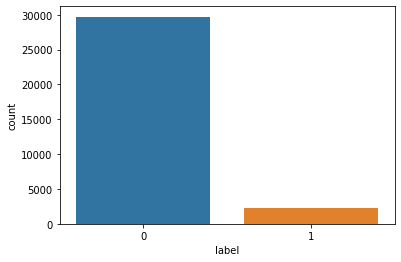

In [3]:
#plotting our dataset which has max label=0 ie positive tweets and a few label=1 ie negative tweets

sns.countplot(tweets_df['label'], label= 'count') 


In [5]:
#getting the lenght of every single tweet
tweets_df['length']= tweets_df['tweet'].apply(len)  # storing the length in a new lenght coloumn

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


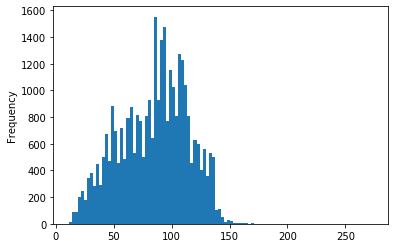

In [6]:
#plotting a histogram based on length
tweets_df['length'].plot(bins=100, kind = 'hist')  

tweets_df.describe() #shows min and max lenght of tweets, here min is 11 average is 84, also shows std & count

In [7]:
#shows tweet of minimum length
tweets_df[tweets_df['length']== 11]['tweet'].iloc[0]


'i love you '

In [8]:
#shows tweet of average length
tweets_df[tweets_df['length']== 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [10]:
#Creating a dataframe of positive tweets

positive= tweets_df[tweets_df['label']== 0]
positive                                    #all positive tweets have Label=0

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [11]:
#creating a dataframe of negative tweets
negative= tweets_df[tweets_df['label']==0]
negative                                   #all negative tweets are labelled as 1 

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [12]:
#PLOTTING THE WORD CLOUD
#Creating a list of all the tweets

sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [13]:
#all the tweets as one string

sentences_as_one_string = " ".join(sentences)

In [14]:
!pip install WordCloud
from wordcloud import WordCloud

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

#Plots a wordcloud of size 20,20 which plots the most used words 

TypeError: 'module' object is not callable

In [ ]:
#plotting wordcloud for negative tweets

negative_list= negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))


In [17]:
# PERFORM DATA CLEANING: REMOVING PUNCTUATION FROM TEXT
import string
string.punctuation
test= 'good morning ..... how is everyone doing? wow ... :)))))))))' #this is an example on how to clean a string
removed=[char for char in test if char not in string.punctuation]
removed_string= "".join(removed)
removed_string

'good morning  how is everyone doing wow  '

In [16]:
# DATA CLEANING: CLEANING OUT STOP WORDS

import nltk   # natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
removed_list_clean= [word for word in removed_string.split() if word.lower() not in stopwords.words('english') ]
removed_list_clean

['good', 'morning', 'everyone', 'wow']

In [20]:
removed_string_clean = " ".join(removed_list_clean)
removed_string_clean

'good morning everyone wow'

In [21]:
# PERFORMING COUNT VECORIZATION / TOKENIZATION

from sklearn.feature_extraction.text import CountVectorizer
sample_data =['this is the first paper','this paper is the second paper', 'and this is the third one', 'is this the first paper']

vectorizer= CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [22]:
# Printing all unique values in Given sample of strings, sample_data.

print(vectorizer.get_feature_names())     # these are all the unique values in sample_data 

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [23]:
# Printing all the tokenized values of strings provided in sample_data

print(x.toarray())            #tokenized values of strings

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


In [24]:
# REMOVING PUNCTUATIONS, STOPWORDS AND VECTORIZATION IN ONE PIPELINE

def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
    return test_punc_removed_join_clean

tweets_df_clean = tweets_df['tweet'].apply(message_cleaning) # testing the function, creating a new dataframe, tweets_df_clean
    

In [25]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [26]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
#apply count vectorization for me but before that clean up the messages for me using analyzer.
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [28]:
tweets_countvectorizer.shape #output: (rows, coloumns). total unique words in our dataset = coloumns. 

(31962, 47386)

In [29]:
x = tweets_countvectorizer

In [30]:
y = tweets_df['label']

In [31]:
# TRAIN A NAIVE BAYES CLASSIFIER MODEL
x.shape

(31962, 47386)

In [32]:
y.shape

(31962,)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # input(x, y, size) : 0.2 means 20% of dataset 


In [36]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()  # naive bayes classifier (NB_classifier)
NB_classifier.fit(x_train, y_train)  # here we are training the model with approx 32000 tweets. 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
# ASSESS TRAINED MODEL PERFORMANCE
# keep in mind that trained model has never seen the dataset yet.
from sklearn.metrics import classification_report, confusion_matrix


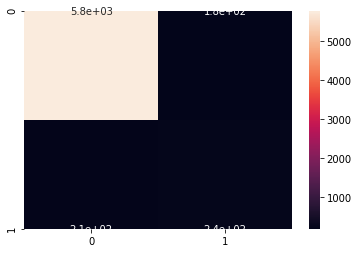

In [38]:
y_predict_test = NB_classifier.predict(x_test)
cm= confusion_matrix(y_test, y_predict_test) #needs 2 inputs, y_test: known truth and y_predict_test:my prediction to compare
sns.heatmap(cm , annot= True) #heatmap input cm 

# output
#our model has succesfully classified 5800 +ve and 2500 -nve tweets
# misclassified  2300 false -ve and 1600 false +ve

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5939
           1       0.57      0.54      0.55       454

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393

